**1**

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'client_id': [1, 10, 12, 43, 100],
    'sex': [0, 1, 0, 0, 1],
    'wealth': ['medium', 'high', 'low', 'medium', 'high'],
    'age': [36, 43, 56, 23, 30]
})

medium_35 = df[(df['wealth'] == 'medium') & (df['age'] > 35)]
print(medium_35)

   client_id  sex  wealth  age
0          1    0  medium   36


**2**

In [ ]:
df['older_than_30'] = df['age'] > 30

**3**

In [ ]:
df.nunique()

client_id        5
sex              2
wealth           3
age              5
older_than_30    2
dtype: int64

**4**

In [ ]:
data = pd.DataFrame({
    'client_id': [1, 5, 10],
    'amount': [100, 300, 9000],
    'date': [37527274725475, 3284284682364, 2342864826482]
})

new_data = df.merge(data, on='client_id', how='inner')
print(new_data)

   client_id  sex  wealth  age  older_than_30  amount            date
0          1    0  medium   36           True     100  37527274725475
1         10    1    high   43           True    9000   2342864826482


**5**

In [ ]:
def read_n_agg(url):
    df = pd.read_csv(url, sep=';', compression="zip")
    result = df.groupby('company')['income'].mean()
    return result

url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/companies.csv.zip?raw=True"
print(read_n_agg(url))

company
En +                                        9.962187e+10
АО «Александрова, Савельев и Мельникова»    7.206782e+10
АО «Андреев-Анисимов»                       6.931948e+09
АО «Андреев-Макарова»                       8.934380e+10
АО «Большаков Кошелева»                     7.860861e+10
                                                ...     
Щекиноазот                                  4.309092e+10
Щукин Лимитед                               6.703036e+10
Эйвон Бьюти Продактс Компани (Avon)         2.503657e+10
Яковлева Инкорпорэйтед                      3.523436e+10
Якушев Лимитед                              3.876468e+10
Name: income, Length: 289, dtype: float64


**6**

In [ ]:
url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/taxi_peru.csv.zip?raw=True"
taxi = pd.read_csv(url, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'], compression='zip')
#taxi

**7**

In [ ]:
taxi['source'].value_counts().idxmax()

'iPhone'

**8**

In [ ]:
driver_score_counts = taxi['driver_score'].value_counts(normalize=True).mul(100).round(2).reset_index()
driver_score_counts.columns = ['driver_score', 'percentage']
driver_score_counts = driver_score_counts.sort_values('driver_score')
print(driver_score_counts)

   driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81


**9**

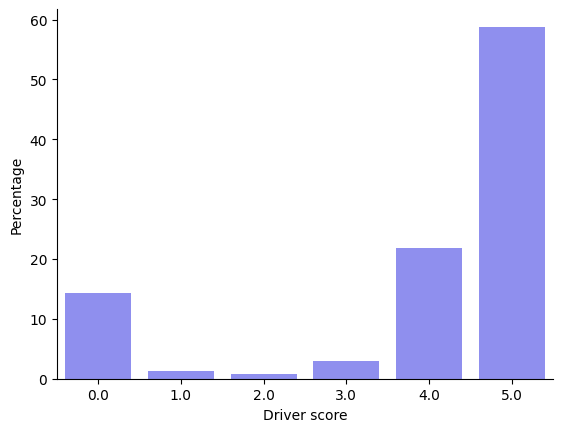

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика
plt.show()

**10**

   rider_score  percentage
2          0.0        2.29
4          1.0        0.21
5          2.0        0.19
3          3.0        1.38
1          4.0        8.83
0          5.0       87.10


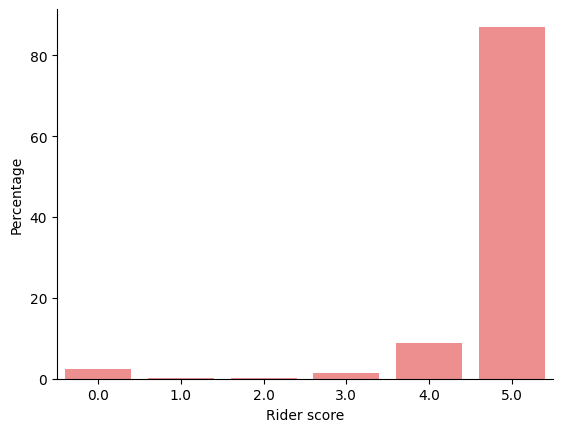

In [ ]:
rider_score_counts = taxi['rider_score'].value_counts(normalize=True).mul(100).round(2).reset_index()
rider_score_counts.columns = ['rider_score', 'percentage']
rider_score_counts = rider_score_counts.sort_values('rider_score')
print(rider_score_counts)

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='red', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика
plt.show()